**README** <br>
All files from assignment1 must be uploaded to run this code


Beta:  [-106.17379612  300.61954771]
MSE of training data:  172822.60339569926
MSE of testing data:  35281.33990446922


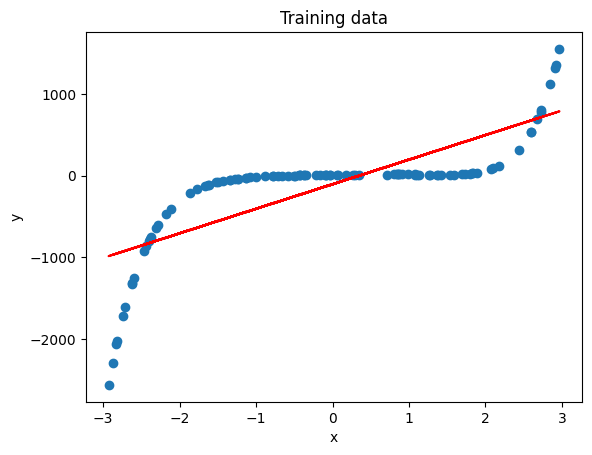

In [5]:
#Question 1:
import matplotlib.pyplot as plt
import numpy as np

#Data
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

#Normal equation: Y = X * Beta

#Add a column of 1s to the X vector
x_train_b = np.c_[np.ones((x_train.shape[0], 1)), x_train]

#Beta = (X^T * X)^-1 * X^T * Y
beta = np.linalg.inv(x_train_b.T.dot(x_train_b)).dot(x_train_b.T).dot(y_train)

#Calculate predicted values
y_train_pred = x_train_b.dot(beta)

#Results
print("Beta: ", beta)
print("MSE of training data: ", np.mean((y_train - y_train_pred) ** 2))
#Evaluation compared to testing data
x_test_b = np.c_[np.ones((x_test.shape[0], 1)), x_test]
y_test_pred = x_test_b.dot(beta)
print("MSE of testing data: ", np.mean((y_test - y_test_pred) ** 2))

#Plot
plt.scatter(x_train, y_train)
plt.plot(x_train, y_train_pred, 'r-')
plt.title("Training data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

a. What kind of relationship exists between the variables (linear, non-linear, or something else)?
  I believe the graph is a non linear relationship. It exhibits an s curve pattern with an initial fast growth, then very slow growth, then fast growth.
b. Does the current model need improvements to capture the observed relationship effectively?
  Yes. The linear regression model only shows the overall trend but does not capture the non linear features of the data. A linear model shouldn't be used for this data. Some modifications I'd suggest would be to use a sigmoid model instead. It would accurately capture the s shape. Some transformations that could improve the models performance could be a log transformation. It would help straighten out the data to better match the line.


MSE: 5006561505.204384
Bathrooms      209185.845184
Land Area       10192.814903
Living area    228669.130358
# Garages       47994.959701
# Rooms        113529.579242
# Bedrooms    -151116.118299
Age of home     -2133.473654
dtype: float64
MSE for Living Area: 12282616798.30218


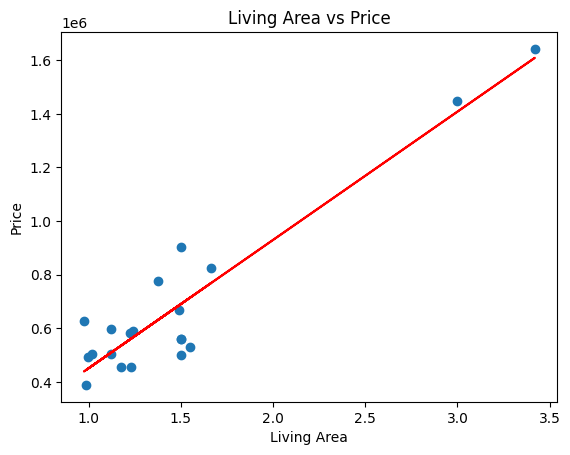

MSE with no Age of Home: 5318026012.19803


In [ ]:
#Question 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_excel("/content/Housing_data_regression.xlsx")
# Drop the target feature and house ID (it doesn't help us predict anything)
X = data.drop(columns=["House ID", 'Price'])
# Target feature
y = data["Price"]

#Add a column of 1s to X to make it a matrix
X_b = np.c_[np.ones((X.shape[0], 1)), X]
#Use the normal equation to find beta
beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
#Use beta to predict Y
y_pred = X_b.dot(beta)

#Calculate the MSE
errors = y - y_pred
mse = np.mean(errors ** 2)
print("MSE:", mse)

#Find the coefficents of each feature to determine the most and least important
coefficients = pd.Series(beta[1:], index=X.columns)
print(coefficients)

#Use the most impactful feature (Living area) as the solo predictor for house price
x_livingarea = data["Living area"]
x_livingarea.head()
x_b_livingarea = np.c_[np.ones((x_livingarea.shape[0], 1)), x_livingarea]
beta_livingarea = np.linalg.inv(x_b_livingarea.T.dot(x_b_livingarea)).dot(x_b_livingarea.T).dot(y)
y_pred_livingarea = x_b_livingarea.dot(beta_livingarea)
mse_livingarea = np.mean((y - y_pred_livingarea) ** 2)
print("MSE for Living Area:", mse_livingarea)
#Plot for visualization
plt.scatter(x_livingarea, y)
plt.plot(x_livingarea, y_pred_livingarea, 'r-')
plt.title("Living Area vs Price")
plt.xlabel("Living Area")
plt.ylabel("Price")
plt.show()


#Remove the least impactful feature (Age of home) and refit the model
X_optimal = data.drop(columns=["Age of home", "House ID", 'Price'])
X_b_optimal = np.c_[np.ones((X_optimal.shape[0], 1)), X_optimal]
beta_optimal = np.linalg.inv(X_b_optimal.T.dot(X_b_optimal)).dot(X_b_optimal.T).dot(y)
y_pred_optimal = X_b_optimal.dot(beta_optimal)
mse_optimal = np.mean((y - y_pred_optimal) ** 2)
print("MSE with no Age of Home:", mse_optimal)

The MSE of the model is 500,6561,505.20 I looked at the coefficient values to determine which had the largest and smallest impact. Living area had the largest coefficient value of 228,669.13 indicating it has the most substantial impact on the house price. The MSE of living area on its own is 12,282,616,798.30218. This is a much higher value than the MSE of the model. While Living Area is an important factor, it should not be the only one considered. The other features significantly contribute to the model's accuracy.
However, age of home is the least impactful feature. It has a coefficient value of 2,133.47. We can also see this because when we remove it from the model, the MSE increases to 5,318,026,012. This is a small increase and shows that excluding age of home only slightly worsens the models overall performance.

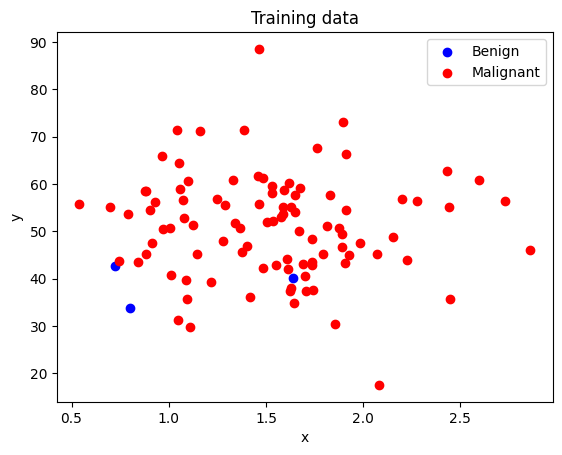

Converged after 6560 iterations
Optimizied theta: [7.23058635 2.40171453 1.79871605 1.15332745 0.9557926  1.14763838]
Training accuracy: 1.0
Test accuracy: 0.9333333333333333


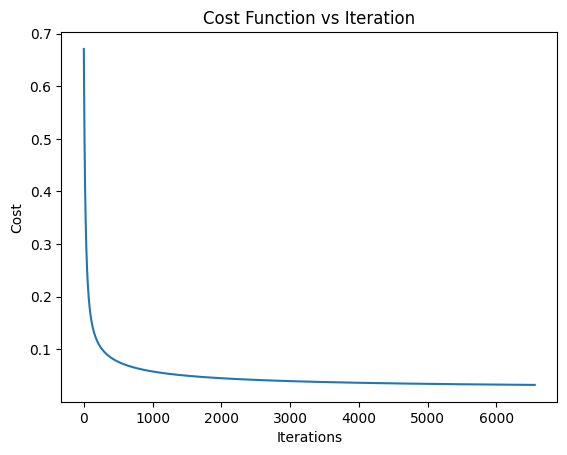

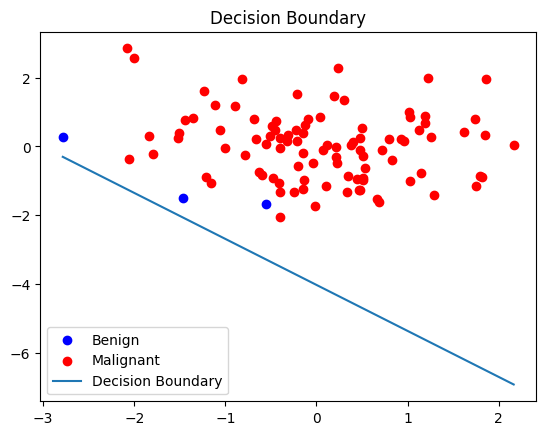

In [9]:
#Tumor malignant y = 1 benign y = 0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Sigmoid function
def sigmoid(z):
  return 1/(1+np.exp(-z))

#Cost function
def cost_function(X, y, theta):
  #X = feature matrix y = real labels theta = parameters
  m = len(y)
  h = sigmoid(X.dot(theta)) #hypothesis
  cost = (-1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
  return cost

#Gradient descent
def gradient_descent(X, y, theta, alpha, num_iters, tol=1e-6):
  m = len(y)
  costs = []
  for i in range(num_iters):
    h = sigmoid(X.dot(theta))
    gradient = (1/m) * X.T.dot(h-y)
    #Update theta
    theta -= alpha * gradient
    #compute and store cost
    cost = cost_function(X, y, theta)
    costs.append(cost)
    #Check stopping criteria
    if i > 0 and abs(costs[-1] - costs[-2]) < tol:
      print("Converged after", i, "iterations")
      break
  return theta, costs

# Decision Boundary
def plot_decision_boundary(X, y, theta):
  #Plot data
  plt.scatter(X[:, 1][y==0], X[:, 2][y==0], color='blue', label='Benign')
  plt.scatter(X[:, 1][y==1], X[:, 2][y==1], color='red', label='Malignant')

  #Plot decision boundary theta0 + theta1*x1 + theta2*x2 = 0
  x_val = [np.min(X[:, 1]), np.max(X[:, 1])]
  #y_val = -(theta[0] + np.dot(theta[1], x_val)) / theta[2]
  y_val = -1 * (theta[0] + theta[1] * np.array(x_val)) / theta[2]
  plt.plot(x_val, y_val, label='Decision Boundary')

  plt.title('Decision Boundary')
  plt.legend()
  plt.show()

#Model evaluation
def predict(X, theta):
  probabilities = sigmoid(X.dot(theta))
  return [1 if prob >= 0.5 else 0 for prob in probabilities]

#Run the data
train_data = pd.read_csv("/content/Question3_Tumor_train_data.csv")
test_data = pd.read_csv("/content/Question3_Tumor_test_data.csv")

#last column is the target and the others are features
X_train = train_data.drop(columns=["Malignancy (y)"])
y_train = train_data["Malignancy (y)"]
X_test = test_data.drop(columns=["Malignancy (y)"])
y_test = test_data["Malignancy (y)"]
#Convert to np array
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

#What does the data look like
plt.scatter(X_train[:, 1][y_train==0], X_train[:, 2][y_train==0], color='blue', label='Benign')
plt.scatter(X_train[:, 1][y_train==1], X_train[:, 2][y_train==1], color='red', label='Malignant')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training data")
plt.legend()
plt.show()

#Standardize the feature
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

#Add a column of 1s to the feature
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]


#Train the model
initial_theta = np.zeros(X_train.shape[1])
alpha = 0.1 #Learning rate
num_iters = 15000 #Max iterations
theta, costs = gradient_descent(X_train, y_train, initial_theta, alpha, num_iters)
print("Optimizied theta:", theta)

#Evaluate the model
y_pred_train = predict(X_train, theta)
accuracy_train = np.mean(y_pred_train == y_train)
print("Training accuracy:", accuracy_train)

# Evaluate with test data
y_pred_test = predict(X_test, theta)
accuracy_test = np.mean(y_pred_test == y_test)
print("Test accuracy:", accuracy_test)

#Plot cost function
plt.plot(range(len(costs)), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs Iteration')
plt.show()

#Plot decision boundary
plot_decision_boundary(X_train, y_train, theta)


1. Why is the sigmoid function critical in logistic regression? How does it influence the interpretation of the output? <br>
The sigmoid function is critical because it maps the any real-valued input to a value between 0 and 1, allowing us to map linear combinations of input features to probabilities. Without the sigmoid function, logistic regression would behave the same as linear regression. <br>
2. What are the key differences between the logistic regression model, particularly in the context of the cost function and type of problem each is used for? <br>
The logitic regression model is used for classification problems and uses the sigmoid function while linear regression predicts continuous outcomes and minimizes the mean squared error. Logistic regression outputs probabilities while linear regression provides continuous values.<br>
3. How would you modify your logistic regression model to handle multi-class classification problems? <br>
I would modify my logistic regression model to use softmax regression. It is a generalization of logistic regression for multi class classification problems.

**Assignment 1 Report** <br>
Linear Regression <br>

The first half of the assignment was using linear regression to model the relationship between the independent variables, $x$ and the dependent variable, $y$. Linear regression was an ideal choice because we are trying to determine the relationship between the two variables. Additionally, after the model is trained, it can make predictions on new data. <br>
The line describing the data is determined with the equation<br>
$Y = β_0 + β_1X+ϵ$
<br> where $β_0$ is the y-intercept,$β_1$ is the slope and ϵ is the error. I found β by using the normal equation: <br>
β = $(X^TX)^{-1}X^TY$ <br>
$β_0 = -300.62$ and $β_1 = -106.17$, thus the final line that was modeled is $y = -106.17 + 300.62 X$. <br>
After the line was calculated, the performance was evaluated. To do this, I examined the mean squared error and scatter plot. <br>
MSE = $\frac{1}{n}\sum_{i=1}^{n} (y_i-\hat{y}_i)^2$
<br> where $y_i$ is the actual value for observation $i$ and $\hat{y}_i$ is the predicted value for observation $i$.
<br>The MSE of the training model was $172,822.60$ and the MSE of the testing model was $35,281.34$. The testing model was signficantly lower than the training model suggesting that the model generalizes well to unseen data. It also suggests that the model is not overfitting. Next I visually examined the line of best fit generated. <br>
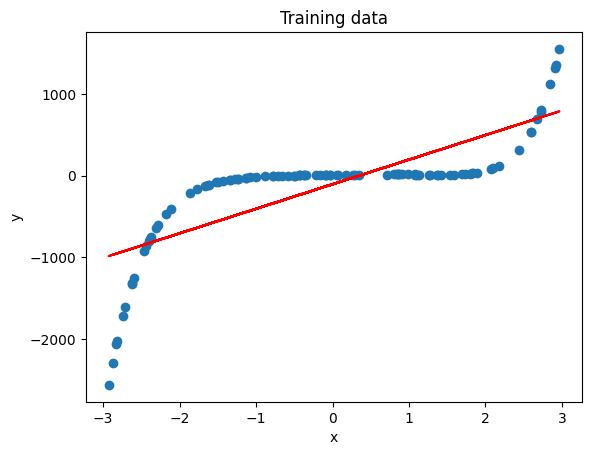
<br>
Here we can see that the line does its best to create a linear representation, however the original data is not very linear. <br>
In question 2, we used linear regression to evaluate a dataset about which attributes affect house prices. We first did a simple linear regression just like the one we did in question 1. Then we calculated the MSE the same way we did for quesion 1 to get 500,6561,505.20. Linear regression was useful in this instance because we could also use it to determine which feature is the most important and which is the least important. This was done by calculating the β for each feature. Then, we saw the lowest absolute value for β was the age of home at 2,133.47. Conversley, the highest value was living area with 228,669.13. This data could be useful for a real estate company to determine which feature they should advertise with to get the most interest. <br>
Finally, I examined logistic regression. I was provided a csv data set of tumors and wheter they are malignant or benign. Logistic regression is more applicable in this scenario because we are trying to determine a binary outcome, malignant or benign. Logistic regression also provides a probability estimate so we can assess how likely a tumor is to be malignant or benign which would be very useful information for medical decisions. <br>
The first step in making logistic regression was to determine the sigmoid function: <br>
$S(z) = \frac{1}{1+e^{-z}}$ <br>
Where $z = β^Tx^i$ <br>
The sigmoid function is crucial to logistic regression because it transforms linear combinations into a probability between 0 and 1. Next, I needed to determine the cost function. <br>
$J(β) = -\frac{1}{m}\sum_{i=1}^{m}[y^ilog(h(x^i))+(1-y^i)log(1-h(x^i))]$ <br>
where $m$ is the number of training elements, $y^i$ is the actual value of the $i$th element (1 or 0) and $h(x^i)$ is the predicted probability that the $i$th training element belongs to a positive class, calculated using the sigmoid function. <br>
The sum is averaged over all the training elements to compute a mean cost, which tells how the model performs across the dataset. Then we must minimize this cost function with gradient descent. <br>
Gradient descent is an iterative optimization algorithm. It updates the model's parameters (β) in the direction that reduces cost. I started with a set of zeroes as the initial value and then calculated the predictions using the sigmoid function. <br>
The stopping criteria was essential to halt the operations of the gradient descent algorithm once it converges. For this example, I decided to do $tol = 1 * 10^{-6}.$ which is a small threshold value, specifically $0.000001$. Meaning, if the change in gradient descent is smaller than this threshold, the algorithm will be considered converged and stop running. This algorithm converged after about $10,000$ iterations. We can also visually see that it converged after about $10,000$ iterations by looking at the cost function graph: <br>
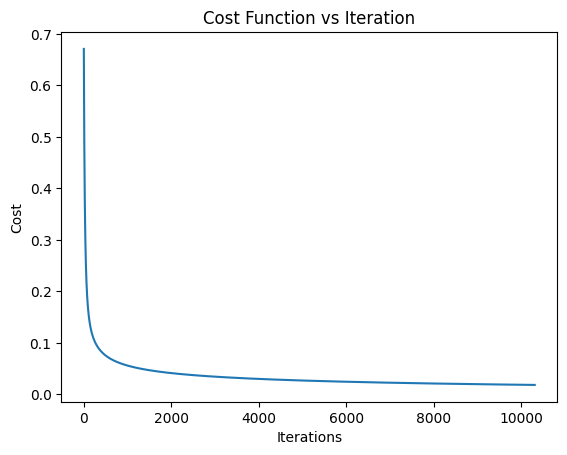 <br>
The logistic regression model was then evaluated by measuring its accuracy by finding the mean value of how many predictions are correct. For the training set we got $1.0$ and for the testing set we got $0.93$ These values are very high and suggests there might be overfitting. For future development, I would suggest adding a regularization value. Finally, we can evaluate the decision boundary. <br>
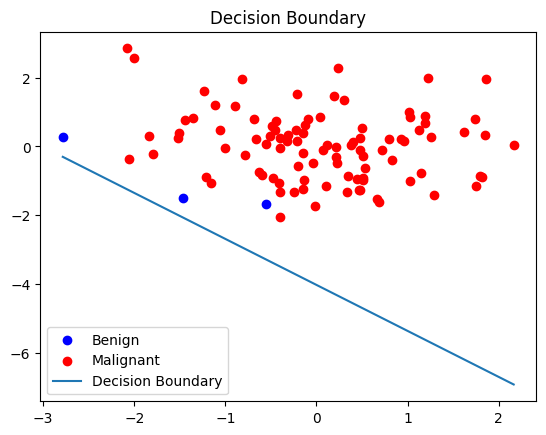 <br>
The decision boundary is not very accurate. It does not separate any data and instead has it all on one side. However, we must consider the original dataset. <br>
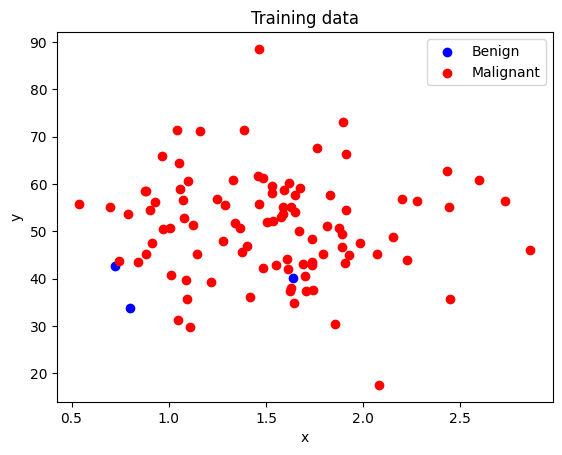 <br>
The original dataset shows that the benign tumors are around the same spots and overlapping with the malignant tumors. This explains why the decision boundary generated is so poor. Thus, I don't think a decision boundary is applicable in this example.